# Circonus for Data Science

TL;DR Circonus has just got upgraded it's python bindings.
Now you can fetch and process your data with the python Data Science toolchain (Jupyer/numpy/pandas) easily.
Here is how to use them.

## Introduction - Circonus as Telemetry Platform

Circonus is best known as a monitoring solution for IT systems.
However, from it's very beginning it was desigend as a telemetry platform that provides means to collect, store, analyze, and alert on generic telemetry data.

Another core design priciple of Circonus is *API first*.
Everything you can do with the UI, can be automated using direct API access.

This combination is a powerful mix, that allows Circonus to be leveraged as a generic data platform:

- Feed in numeric data from all kinds of sources.
- The data will be stored, indexed and backed-up and for years going forward.
- Act on changes in incoming data using complex alerting rules.
- Visualize and analyze your data with the Circonus UI.
- Access stored data using the Circonus API for further analysis.

We already have a few customers in the IoT domain that leverage our data processing infrastructure for their product.

<hr>

A frequent request we were hearing from many customers is:

> How can I analyze my data with Python?

Data Science has pretty much converged to Python/Jupyer/Numpy toolchain at this point, a seamless integration with this environment unlocks a whole spectrum of advanced data anlaytics capabilities.

### Upgraded Python API Bindings 

For a long time Circonus has provided python API bindings under https://github.com/circonus-labs/python-circonusapi.
These bindings are a thin wrapper, that allow full access to all API features (including the creation of checks and graphs), but are not particularly convenient for fetching and processing data.

These bindings have just gained another module called `circonusdata` which is specifically designed for this purpose.
In the following we will walk you through it's basic usage and give some applications.

### Quick Tour

In [ ]:
import circdata

# You need an API token to connect to the API. You can create one under Integrations > API Tokens.
# api_token = "..." 
circ = circdata.CirconusData(api_token)

In [ ]:
# Search for some metrics
M = circ_data.search('duration')

In [61]:
# The resulting object is a list of metrics, that can be indexed, iterated over, etc.
print(M2[0])
# [ m.type() for m in M2 ]

CirconusMetric{check_id=195902,name=duration}


In [39]:
# Printing the list, gives a table representation of the fetched metrics
print(M2)

check_id   type       metric_name
--------------------------------------------------
195902     numeric    duration                                          
3977       numeric    http_duration                                     
218003     numeric    duration                                          
154743     numeric    duration                                          
217833     numeric    duration                                          
217834     numeric    duration                                          
218002     numeric    duration                                          
222857     numeric    duration                                          
222854     numeric    duration                                          
222862     numeric    duration                                          
222860     numeric    duration                                          
222856     numeric    duration                                          
222855     numeric    duration         

In [ ]:
# Metric lists provide a .fetch() method that can be used to fetch data
R2N = M2.fetch(
    start=datetime(2018,1,1).timestamp(),  # start at Midnight UTC 2018-01-01
    period=600,  # return 600 second (=10min) aggregates
    count=20,    # return 20 samples
    kind="value" # return (mean-)value aggregate
)

In [56]:
# The resulting object is a dict that maps metrics names to the fetched data
# This is designed in such a way that it can be directly passed to a pandas DataFrame constructor.
import pandas as pd
df = pd.DataFrame(R2N)
df

,154743/duration,195902/duration,217833/duration,217834/duration,218002/duration,218003/duration,222854/duration,222855/duration,222856/duration,222857/duration,...,222860/duration,222861/duration,222862/duration,222863/duration,222864/duration,222865/duration,222866/duration,222867/duration,222868/duration,3977/http_duration
0,1.1,2.4,1.0,1.0,1.1,1.0,11.7,1.0,1.0,11.6,...,11.7,1.0,1.0,11.8,1.5,1.0,11.5,1.1,1.0,105.284522
1,1.0,2.0,1.0,1.0,1.1,1.0,11.8,1.0,1.0,11.7,...,11.5,1.1,1.0,11.7,2.0,1.0,11.7,1.1,1.0,104.656135
2,1.6,2.2,1.0,1.0,1.0,1.0,11.6,1.0,1.0,11.9,...,11.7,1.3,1.0,11.9,1.5,1.0,11.7,1.1,1.0,104.633615
3,1.9,1.9,1.0,1.0,1.0,1.0,11.5,1.0,1.0,11.7,...,11.8,1.0,1.0,12.0,1.1,1.0,11.7,1.4,1.0,105.006589
4,1.0,2.4,1.0,1.0,1.1,1.6,11.7,1.1,1.0,11.3,...,11.7,1.0,1.0,11.8,1.2,1.0,11.9,1.0,1.0,104.903919
5,2.4,2.2,1.0,2.0,1.0,1.0,11.7,1.0,1.0,12.1,...,11.7,1.0,1.0,11.9,1.4,1.0,11.7,1.1,1.0,105.318095
6,1.0,2.1,1.0,1.0,1.0,1.1,11.7,2.0,1.0,11.8,...,11.8,1.0,1.0,11.7,1.2,1.0,11.8,1.0,1.0,105.125203
7,1.0,2.0,1.0,1.0,1.0,1.0,11.7,1.0,1.0,11.6,...,11.6,1.0,1.0,11.8,1.3,1.0,11.9,1.0,1.0,105.137328
8,1.0,2.0,1.0,1.1,1.1,1.2,11.6,1.0,1.0,11.9,...,11.6,1.0,1.1,11.6,2.3,1.0,11.4,1.0,1.0,104.926864
9,1.0,2.1,1.0,1.0,1.1,1.0,11.7,1.0,1.0,11.8,...,12.2,1.0,1.0,11.6,2.0,1.0,11.6,1.1,1.0,104.941367


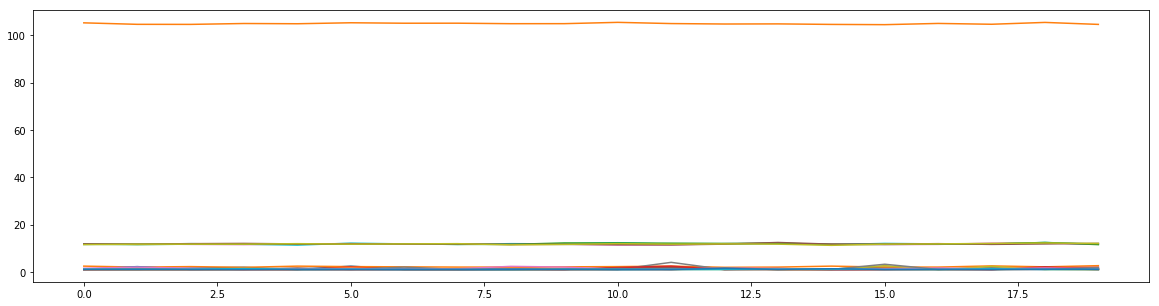

In [51]:
%matplotlib inline
df.plot(figsize=(20,5),legend=False)

In [ ]:
A = circ_data.caql("pass{123,1,2}", 1467892954, 60, 20)
AH = circ_data.caql("histogram{123,1,2}", 1467892954, 60, 20)
C = circ_data.caql("""search:metric("duration")""", datetime(2018,1,1).timestamp(), 60, 2000)
CH = circ_data.caql('search:metric:histogram("a*") | histogram:merge()', 1467892954, 60, 20)

## Connecting to the API

We will assume that you already created a Circonus account and collected some data.
Instructions how to do this can be found on https://login.circonus.com/resources/docs/user/

In order to connect to the Circonus API you will need an API token.
You can create a new one under Integrations > API Tokens in the UI.

It's considered best practice to store that API token in a separate config file.
In this example we a JSON file `~/circonusrc.json` that holds the token.

In [5]:
%%writefile ~/work/.circonusrc.json.example
{
    "demo" : "1193d5ff-0000-0000-0000-a7f9afd5791b"
}

Writing /home/jovyan/work/.circonusrc.json.example


In [6]:
import json, os
with open(os.path.expanduser("~/work/.circonusrc.json"),"r") as fh:
    config = json.load(fh)

In [7]:
circ_account = "demo"
circ_token = config[circ_account]

Now that we have the token available, we can import the Circons python API wrapper.

In [8]:
from circonusapi import circonusapi
circ_api = circonusapi.CirconusAPI(circ_token)

CirconusAPI is a very small warpper around the Circonus REST API.
In order to use it you will have to refer to the API Documentation https://login.circonus.com/resources/api.


In [9]:
circ_api.api_call("GET", "/check")[0]

{'_cid': '/check/235446',
 '_check_bundle': '/check_bundle/195464',
 '_active': True,
 '_details': {},
 '_check_uuid': '5edef88f-42af-4981-94a9-5d17451bade2',
 '_broker': '/broker/2',
 '_reverse_url': ''}

In [10]:
# circ_api.api_call("GET", "/check_bundle")

In addition to the low level CirconusAPI class, there is also the CirconusData class, that let's you perform data queries more easily.

In [13]:
from datetime import datetime
import circdata
from importlib import reload
reload(circdata)
circ_data = circdata.CirconusData(circ_token)

In [26]:
M1 = circ_data.search('api`GET`/getState')
M2 = circ_data.search('duration')

In [30]:
R1H = M1.fetch(datetime(2018,1,1).timestamp(), 600, 20, kind="histogram")
R1N = M1.fetch(datetime(2018,1,1).timestamp(), 600, 20, kind="value")
R2H = M2.fetch(datetime(2018,1,1).timestamp(), 600, 20, kind="histogram")
R2N = M2.fetch(datetime(2018,1,1).timestamp(), 600, 20, kind="value")

In [17]:
A = circ_data.caql("pass{123,1,2}", 1467892954, 60, 20)

AH = circ_data.caql("histogram{123,1,2}", 1467892954, 60, 20)

C = circ_data.caql("""search:metric("duration")""", datetime(2018,1,1).timestamp(), 60, 2000)

CH = circ_data.caql('search:metric:histogram("a*") | histogram:merge()', 1467892954, 60, 20)